## Decomposition

Also, multi-objective problems can be decomposed using a scalarization function.
In the following the contour lines of different methods are shown.

Let us first make the necessary imports and define the points in the design space:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pymoo.factory import get_decomposition
from pymoo.util.misc import all_combinations

# number of points to be used for plotting
n_points = 100

# the xlim
P = np.linspace(0, 3, n_points)

# used for the meshgrid
X = all_combinations(P,P)

A method to plot the contours:

In [2]:
def plot_contour(X, F):
    _X = X[:, 0].reshape((n_points,n_points))
    _Y = X[:, 1].reshape((n_points,n_points))
    _Z = F.reshape((n_points,n_points))
    
    fig, ax = plt.subplots()
    ax.contour(_X,_Y, _Z, colors='black')
    ax.arrow(0, 0, 2.5, 2.5, color='blue', head_width=0.1, head_length=0.1, alpha=0.4)
    ax.set_aspect('equal')

And then define the weights to be used by the decomposition functions:

In [3]:
weights = [0.5, 0.5]

### Weighted Sum

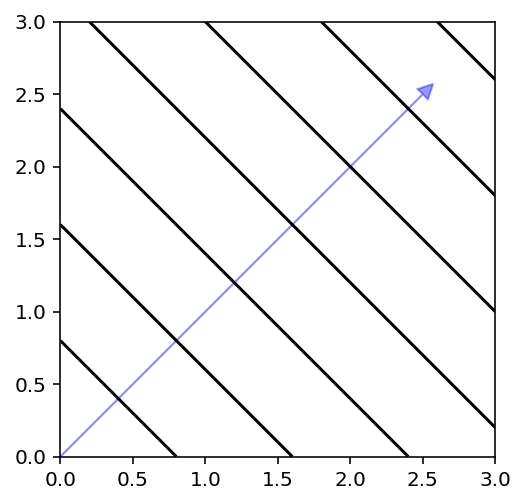

In [4]:
plot_contour(X, get_decomposition("weighted-sum").do(X, weights=weights))

### Tchebysheff

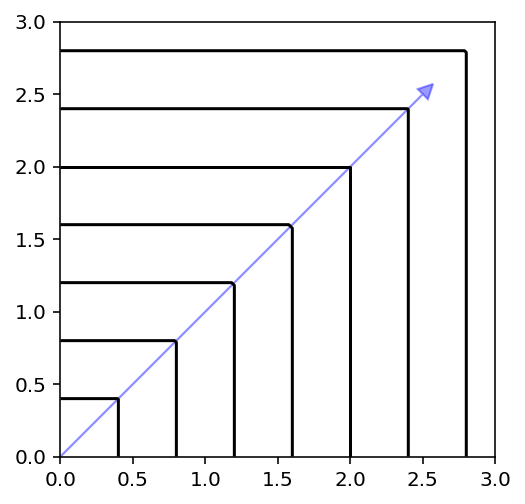

In [5]:
plot_contour(X, get_decomposition("tchebi").do(X, weights=weights))

### Achievement Scalarization Function (ASF)

Details can be found in <cite data-cite="asf"></cite>.

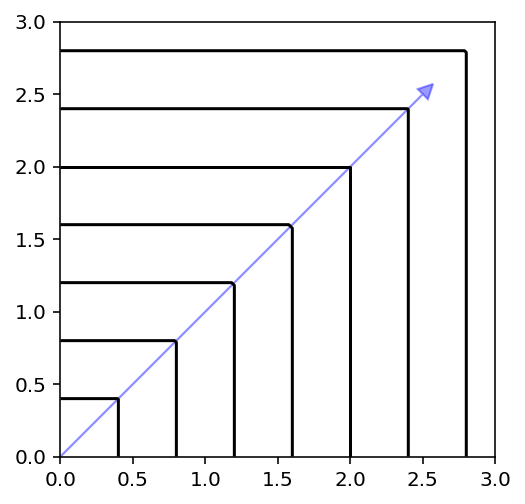

In [6]:
plot_contour(X, get_decomposition("asf", eps=0).do(X, weights=weights))

### Augmented Achievement Scalarization Function (AASF)

Details can be found in <cite data-cite="aasf"></cite>.

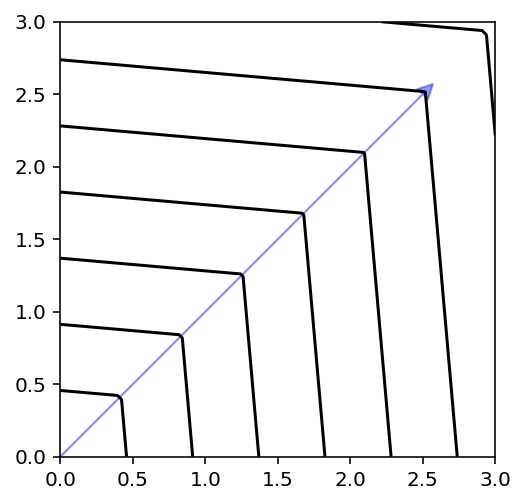

In [7]:
plot_contour(X, get_decomposition("aasf", eps=0, beta=5).do(X, weights=weights))

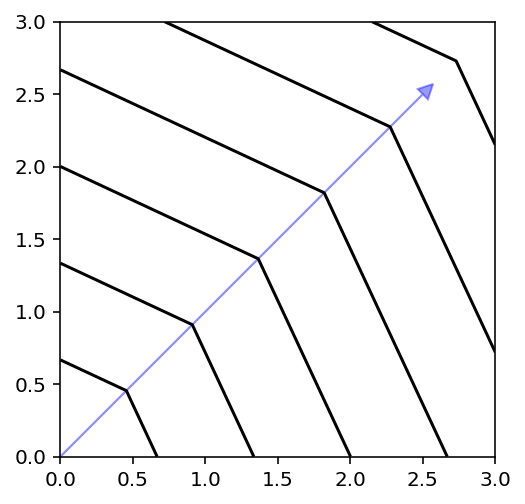

In [8]:
plot_contour(X, get_decomposition("aasf", eps=0, beta=25).do(X, weights=weights))

### PBI

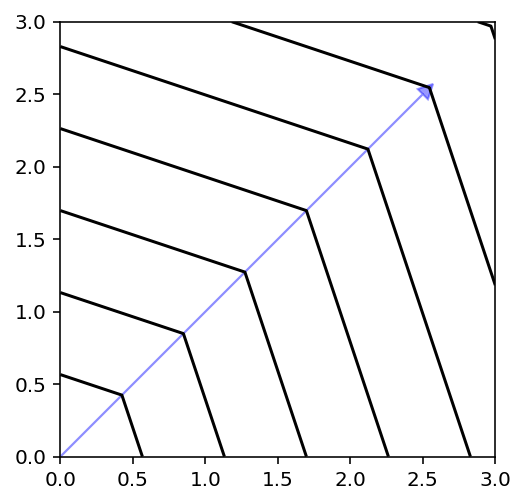

In [9]:
plot_contour(X, get_decomposition("pbi", theta=0.5, eps=0).do(X, weights = weights))

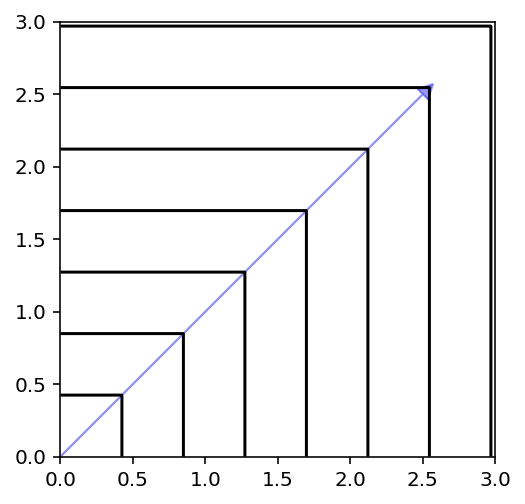

In [10]:
plot_contour(X, get_decomposition("pbi", theta=1, eps=0).do(X, weights = weights))

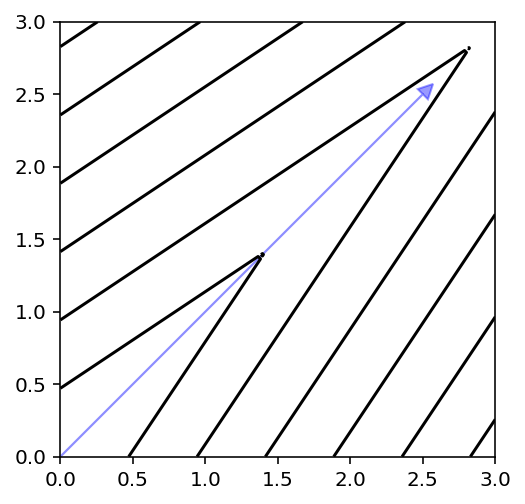

In [11]:
plot_contour(X, get_decomposition("pbi", theta=5, eps=0).do(X, weights = weights))